In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("churn_prediction.csv")

In [3]:
df.shape

(28382, 21)

In [4]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [5]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [6]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [8]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [9]:
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


In [10]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [11]:
df['occupation'].value_counts()/len(df)*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

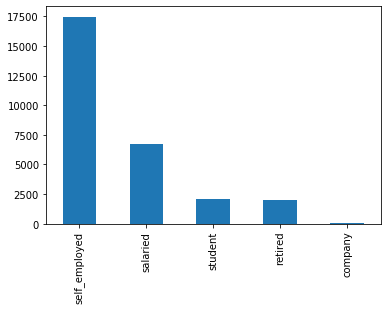

In [12]:
df['occupation'].value_counts().plot(kind='bar')

In [13]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [14]:
df['gender'].value_counts()/len(df)*100

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

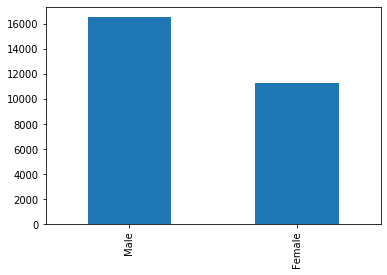

In [15]:
df['gender'].value_counts().plot(kind='bar')

In [16]:
df.drop_duplicates()
df.shape

(28382, 21)

In [17]:
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


In [18]:
df = df.astype({'dependents': 'object','customer_nw_category': 'object'})

In [19]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                              float64
customer_nw_category               object
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [20]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [21]:
df['gender'].fillna(value = df['gender'].mode()[0], inplace = True)

In [22]:
df['dependents']

0          0
1          0
2          0
3        NaN
4          2
5          0
6          0
7          0
8          0
9          3
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         1
19         0
20         0
21         0
22         0
23         0
24         2
25       NaN
26         2
27         0
28         0
29         0
        ... 
28352      0
28353      0
28354    NaN
28355      2
28356      2
28357      1
28358      0
28359      0
28360      0
28361      0
28362      0
28363      0
28364      0
28365      0
28366      0
28367      0
28368    NaN
28369      0
28370      0
28371      0
28372      1
28373      0
28374      0
28375      0
28376      0
28377      0
28378      0
28379      0
28380      3
28381      0
Name: dependents, Length: 28382, dtype: object

In [23]:
df['dependents'].fillna(value = df['dependents'].mode()[0], inplace = True)

In [24]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [25]:
temp = ['gender','dependents','occupation','customer_nw_category','city']
for i in temp:
    print('****value count in', i, '****')
    print(df[i].value_counts())
    print('')

****value count in gender ****
Male      17073
Female    11309
Name: gender, dtype: int64

****value count in dependents ****
0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

****value count in occupation ****
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

****value count in customer_nw_category ****
2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

****value count in city ****
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
5

In [26]:
def test_func(column_labels):
    occupation = column_labels[0]
    age = column_labels[1]

    if pd.isnull(occupation):
        if age < 25:
            return "student"

        elif age >= 25 and age < 60:
            return "salaried"

        else:
            return "retired"

    else:
        return occupation


df['occupation'] = df[['occupation', 'age']].apply(test_func, axis = 1)

In [27]:
df['occupation'].isnull().sum()

0

In [28]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [29]:
df['city'].fillna(value = df['city'].mean(), inplace = True)
df['days_since_last_transaction'].fillna(value = df['days_since_last_transaction'].mean(), inplace = True)

In [30]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [31]:
df.head(90)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.000000,2,1666,60.000000,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.000000,1,1,98.000000,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.000000,2,317,172.000000,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.000000,2,4110,19.000000,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.000000,2,38,0.000000,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [32]:
df['gender'] = pd.get_dummies(df['gender'])
df['dependents'] = pd.get_dummies(df['dependents'])
df['occupation'] = pd.get_dummies(df['occupation'])
df['customer_nw_category'] = pd.get_dummies(df['customer_nw_category'])

In [33]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,1,0,187.000000,0,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,0,1,0,796.109576,0,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,0,1,0,146.000000,0,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,0,1,0,1020.000000,0,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,0,0,0,1494.000000,0,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,1,1,0,1096.000000,0,1666,60.000000,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,0,1,0,1020.000000,1,1,98.000000,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,0,1,0,623.000000,0,317,172.000000,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,0,1,0,1096.000000,0,4110,19.000000,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,0,0,0,1020.000000,0,38,0.000000,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [34]:
x = df.drop(['churn'], axis=1)
y = df['churn']
x.shape, y.shape

((28382, 20), (28382,))

In [35]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size = 0.3, random_state=56)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
cols = train_x.columns
cols

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

In [38]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head(90)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,0.942668,0.085620,0.089888,0.0,1.0,0.0,0.398058,0.0,0.070906,0.128767,0.001611,0.001304,0.000463,0.003948,1.557235e-07,2.722871e-04,1.721925e-07,1.626398e-07,0.001334,0.001254
1,0.410734,0.201431,0.550562,0.0,1.0,0.0,0.549150,1.0,0.053964,0.150685,0.001490,0.001174,0.000377,0.003987,4.604000e-07,1.457358e-05,5.090908e-07,4.808481e-07,0.001205,0.001162
2,0.926923,0.091674,0.370787,1.0,1.0,0.0,0.618932,0.0,0.174650,0.586301,0.001550,0.001982,0.001021,0.004949,1.015588e-07,6.351066e-08,1.122994e-07,1.060694e-07,0.001496,0.001973
3,0.655147,0.145688,0.348315,1.0,1.0,0.0,0.376214,0.0,0.073206,0.191775,0.001373,0.001302,0.000467,0.003682,2.572824e-07,1.608937e-07,2.844919e-07,2.687092e-07,0.001086,0.001271
4,0.174011,0.195770,0.674157,1.0,1.0,0.0,0.618932,0.0,0.206860,0.041096,0.001354,0.001035,0.000273,0.003780,2.143568e-05,3.085602e-04,2.817219e-05,5.230991e-04,0.001069,0.001051
5,0.389411,0.032471,0.460674,1.0,1.0,0.0,0.248180,0.0,0.282368,0.063014,0.001744,0.001130,0.000479,0.005360,1.185571e-03,7.742457e-04,4.417112e-07,4.172064e-07,0.001412,0.001077
6,0.498828,0.075163,0.561798,1.0,1.0,0.0,0.248180,0.0,0.060866,0.063014,0.001431,0.001051,0.000340,0.003948,2.902010e-04,1.814796e-04,3.743315e-08,1.010219e-03,0.001133,0.001055
7,0.199228,0.002595,0.235955,1.0,1.0,0.0,0.554612,0.0,0.025518,0.054795,0.001311,0.000988,0.000108,0.003576,8.625730e-06,6.662353e-04,3.593582e-07,3.394222e-07,0.001022,0.000860
8,0.581939,0.096706,0.303371,0.0,1.0,0.0,0.080704,0.0,0.076344,0.013699,0.001272,0.000900,0.000088,0.003534,1.936050e-04,9.738301e-08,1.721925e-07,1.626398e-07,0.000943,0.000883
9,0.947817,0.274078,0.584270,0.0,0.0,0.0,0.088592,0.0,0.367706,0.049315,0.001228,0.000896,0.000104,0.003692,8.524171e-05,5.209991e-05,2.153155e-05,4.973242e-05,0.000936,0.000889


In [39]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,0.353995,0.296721,0.516854,1.0,0.0,0.0,0.747573,0.0,0.021334,0.016438,0.001343,0.000952,0.000220,0.004242,5.128721e-05,1.270213e-08,2.178759e-04,1.016690e-03,0.001019,0.001008
1,0.737466,0.217784,0.337079,0.0,1.0,0.0,0.665049,0.0,0.018406,0.169863,0.001781,0.001474,0.000652,0.004185,1.083294e-07,6.774470e-08,1.197861e-07,1.131407e-07,0.001503,0.001463
2,0.517378,0.212595,0.629213,1.0,1.0,0.0,0.374393,0.0,0.047689,0.339726,0.001189,0.000873,0.000020,0.003524,3.723824e-07,2.328724e-07,1.848449e-05,8.061277e-06,0.000900,0.000838
3,0.160016,0.047174,0.269663,0.0,1.0,0.0,0.618932,0.0,0.230914,0.208219,0.000911,0.000578,0.000902,0.007583,3.249883e-07,2.032341e-07,3.593582e-07,3.394222e-07,0.000613,0.000564
4,0.657293,0.201981,0.853933,0.0,1.0,0.0,0.248180,0.0,0.068605,0.931507,0.000986,0.000654,0.000241,0.003854,1.489530e-07,9.314897e-08,1.647059e-07,6.689368e-03,0.000690,0.001284


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [41]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

C:\Users\Rajendra Sarpal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred_train = logreg.predict_proba(train_x)
pred_valid = logreg.predict_proba(test_x)

In [43]:
roc_auc_score(train_y, pred_train[:,1])

0.7329672921060265

In [44]:
roc_auc_score(test_y, pred_valid[:,1])

0.7469546831406277